<a href="https://colab.research.google.com/github/carlosenciso/WW3ModelPrePost/blob/master/NOTEBOOK/WW3_prepost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----
<div style="width: 100%; overflow: hidden;">
    <div style="width: 400px; float: left;"> </div>
    <div style="float: left; margin-left: 10px;"> <h1><strong>WaveWatch Model III Downloader</strong></h1>
<h1><strong>Pre/Post Processing</strong></h1>
        <p><strong>Created by:</strong> Carlos Enciso Ojeda</p><br>
        <strong>Atmopsheric and Climate Research</strong></br>
        <strong>Last modified time: 2021-03-30 T18:00:14-05:00<strong><br>
        <a href="https://github.com/carlosenciso/">www.atmcenciso.com</a><br/>
        <strong>Email:<strong> carlos.enciso.o@gmail.com | cenciso@senamhi.gob.pe</p></div>

----

In [1]:
#---- Install Dependencies ----#
!pip install cfgrib
!apt install libeccodes-tools

     |████████████████████████████████| 51kB 2.9MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  ed libeccodes-data libeccodes0 mksh
The following NEW packages will be installed:
  ed libeccodes-data libeccodes-tools libeccodes0 mksh
0 upgraded, 5 newly installed, 0 to remove and 30 not upgraded.
Need to get 3,661 kB of archives.
After this operation, 81.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 ed amd64 1.10-2.1 [49.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libeccodes-data all 2.6.0-2 [1,260 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libeccodes0 amd64 2.6.0-2 [1,601 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mksh amd64 56c-1 [525 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libeccodes-tools amd64 2.6.0-2 [226 kB]
Fetched 3,661 kB in 

### **1. Importing modules**


In [6]:
import xarray as xr
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


### **2. Downloader WW3 model**
Dataset URL's was getting from https://polar.ncep.noaa.gov/waves/hindcasts/ website for hindcast. After hindcast dataset was getting from https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/ww3_global/WaveWatch_III_Global_Wave_Model_best.ncd.html 

#### **2.1 Download Grib2**

In [ ]:
def DownloadWW3(iDate,eDate,dirigrib=None):
  """
    Introduce initial and end dates to download dataset
    iDate: Initial Date in string format (YYYY-MM)
    eDate: End Date in string format(YYYY-MM)
  """
  #---- Range time ----#
  drg = pd.date_range(iDate,eDate,freq='1MS')
  #---- Setting parameters ----#
  main_url = ['https://polar.ncep.noaa.gov/waves/hindcasts/nopp-phase2/',
              'ftp://polar.ncep.noaa.gov/pub/history/waves/multi_1/']
  vars = ['dp','hs','tp']
  cname = ['multi_reanal.glo_30m_ext','multi_1.glo_30m']
  #---- Split daterange ----#
  for dts in drg:
    if dts < datetime(2010,1,1):
      urls=['{}{}/gribs/{}.{}.{}.grb2'.format(main_url[0],dts.strftime('%Y%m'),
                                            cname[0],v,dts.strftime('%Y%m')) for v in vars]
    elif dts >= datetime(2010,1,1) and dts <= datetime(2019,6,1):
      urls=['{}{}/gribs/{}.{}.{}.grb2'.format(main_url[1],dts.strftime('%Y%m'),
                                            cname[1],v,dts.strftime('%Y%m')) for v in vars]
    else:
      pass
    #---- Download----#
    try:
      print('Downloading...')
      print(urls)
      _ = [os.system(f'wget -P {dirigrib} {x}') for x in urls]
    except:
      pass

In [ ]:
dirigrib='/content/drive/MyDrive/COLAB/CONSULTANCY/DATASET/WW3/'
DownloadWW3('2010-01','2010-12',dirigrib=dirigrib)

Downloading...
['ftp://polar.ncep.noaa.gov/pub/history/waves/multi_1/201001/gribs/multi_1.glo_30m.dp.201001.grb2', 'ftp://polar.ncep.noaa.gov/pub/history/waves/multi_1/201001/gribs/multi_1.glo_30m.hs.201001.grb2', 'ftp://polar.ncep.noaa.gov/pub/history/waves/multi_1/201001/gribs/multi_1.glo_30m.tp.201001.grb2']
Downloading...
['ftp://polar.ncep.noaa.gov/pub/history/waves/multi_1/201002/gribs/multi_1.glo_30m.dp.201002.grb2', 'ftp://polar.ncep.noaa.gov/pub/history/waves/multi_1/201002/gribs/multi_1.glo_30m.hs.201002.grb2', 'ftp://polar.ncep.noaa.gov/pub/history/waves/multi_1/201002/gribs/multi_1.glo_30m.tp.201002.grb2']
Downloading...
['ftp://polar.ncep.noaa.gov/pub/history/waves/multi_1/201003/gribs/multi_1.glo_30m.dp.201003.grb2', 'ftp://polar.ncep.noaa.gov/pub/history/waves/multi_1/201003/gribs/multi_1.glo_30m.hs.201003.grb2', 'ftp://polar.ncep.noaa.gov/pub/history/waves/multi_1/201003/gribs/multi_1.glo_30m.tp.201003.grb2']
Downloading...
['ftp://polar.ncep.noaa.gov/pub/history/waves/

#### **2.2 Download ASCII**

In [13]:
class WW3downloaderascii:
  #---- Parameters ----#
  vars=['Thgt','Tper','Tdir']
  pre_url='https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/ww3_global/'
  def __init__(self,iDate=None,eDate=None,lat=None,lon=None,
               diriout=None,nameout=None,**kwargs):
    self.iDate = iDate; self.eDate=eDate
    nidays=datetime.strptime(iDate,'%Y-%m-%d')-datetime(2010,11,7)
    nedays=datetime.strptime(eDate,'%Y-%m-%d')-datetime(2010,11,7)
    ih=nidays.days*24+21; eh=nedays.days*24+21
    ilat=np.arange(-77.5,77.5,.5).tolist().index(lat)
    ilon=np.arange(0,359.5,.5).tolist().index(lon+180)
    url=[f'WaveWatch_III_Global_Wave_Model_best.ncd.ascii?lon%5B{ilon}%5D,',
         f'lat%5B{ilat}%5D,z%5B0:1:0%5D,time%5B{ih}:1:{eh}%5D,',
         f'Thgt%5B{ih}:1:{eh}%5D%5B0:1:0%5D%5B{ilat}%5D%5B{ilon}%5D,',
         f'Tper%5B{ih}:1:{eh}%5D%5B0:1:0%5D%5B{ilat}%5D%5B{ilon}%5D,',
         f'Tdir%5B{ih}:1:{eh}%5D%5B0:1:0%5D%5B{ilat}%5D%5B{ilon}%5D']
    self.lat=lat; self.lon=lon
    self.url=''.join(map(str, url))
    self.main_url=self.pre_url+self.url
    self.diriout=diriout
    self.nameout=nameout
    self.copyright = 'Carlos Enciso Ojeda'
    self.license = 'MIT@License'
  @property
  def downloadww3(self):
    print(self.main_url)
    try:
      os.system(f'wget -c -P {self.diriout} {self.main_url}')
    except:
      print('Something went wrong. Check it!')
      #---- Rename it ----#
    fili=[os.path.join(self.diriout,x) for x in os.listdir(self.diriout) \
          if self.url[:4] in x]
    os.rename(fili[0],self.diriout+self.nameout)
  def ascii2csv(self):
    #---- Converto CSV ----#
    with open(self.diriout+self.nameout,'r+') as f:
      file_lines=f.readlines()
      Lines=list(file_lines)
      #---- Looking for position ----#
      pos_vars = {k:[n for n,x in enumerate(Lines) if f'{k}.' in x][:2] for k in self.vars}
      contents = {k:Lines[v[0]:v[1]] for k,v in pos_vars.items()}
      contents = {k:list(map(float,list(filter(None,[x.strip('\n').split(',')[-1].strip() \
                                                     for x in v if k not in x])))) \
                                                     for k,v in contents.items()}
      self.df = pd.DataFrame.from_dict(contents)
      self.df['date'] = pd.date_range(self.iDate,self.eDate,freq='1H')
      self.df.set_index('date',inplace=True)
#----------------------
# Funcs using my class
#----------------------
def downloadASCII(iDate=None,eDate=None,diri_ascii=None,ascii_name=None,
                  downloads=None,lat=None,lon=None):
  nmnths = np.diff(np.array([datetime.strptime(x,'%Y-%m-%d') \
                             for x in [iDate,eDate]]))[0]
  nmnths = nmnths.days/30
  nameit = f'{diri_ascii}{ascii_name}_lat_{ilat}_lon_{ilon}_{iDate}_to_{eDate}.csv'
  #---- For downloading  ----#
  if nmnths<=2:
    ww3 = WW3downloaderascii(iDate=iDate,eDate=eDate,lat=-14,
                             lon=-77,diriout=diri_ascii,nameout=ascii_name)
    if downloads==True:
      ww3.downloadww3
    ww3.ascii2csv()
    dfs=ww3.df
  else:
    idrg = pd.date_range(iDate,eDate,freq='1MS')
    edrg = pd.date_range(iDate,eDate,freq='1M')
    #---- Looping it 'cause it takes too much time if you want ----#
    #---- to retrieve data for more than one year ----#
    container=[]
    for i,e in zip(idrg,edrg):
      print(i.strftime('%Y-%m'))
      #---- Download ascii ----#
      ww3 = WW3downloaderascii(iDate=i.strftime('%Y-%m-%d'),
                               eDate=e.strftime('%Y-%m-%d'),
                               lat=ilat,lon=ilon,diriout=diri_ascii,
                               nameout=ascii_name)
      #---- May it takes its time depending the range time ----#
      if downloads==True:
        ww3.downloadww3
      ww3.ascii2csv()
      container.append(ww3.df)
    dfs=pd.concat(container)
    dfs=dfs.rename(columns={'Tdir':'dirpw','Tper':'perpw','Thgt':'swh'})
  try:
      dfs.to_csv(nameit)
      print(f'Saveing... {nameit}')
  except:
      pass

In [14]:
#---- Using my class ----#
diri_ascii='/content/drive/MyDrive/COLAB/CONSULTANCY/DATASET/ASCII/'
ascii_name='WW3ascii'
ilat=-14
ilon=-77
iDate='2011-01-01'
eDate='2011-02-01'
downloadASCII(iDate=iDate,eDate=eDate,diri_ascii=diri_ascii,ascii_name=ascii_name,
              downloads=True,lat=ilat,lon=ilon)

https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/ww3_global/WaveWatch_III_Global_Wave_Model_best.ncd.ascii?lon%5B206%5D,lat%5B127%5D,z%5B0:1:0%5D,time%5B1341:1:2085%5D,Thgt%5B1341:1:2085%5D%5B0:1:0%5D%5B127%5D%5B206%5D,Tper%5B1341:1:2085%5D%5B0:1:0%5D%5B127%5D%5B206%5D,Tdir%5B1341:1:2085%5D%5B0:1:0%5D%5B127%5D%5B206%5D
Saveing... /content/drive/MyDrive/COLAB/CONSULTANCY/DATASET/ASCII/WW3ascii_lat_-14_lon_-77_2011-01-01_to_2011-02-01.csv


### **3. Post-Processing**

In [ ]:
class postWW3grb2:
  vars=['dp','hs','tp']
  def __init__(self,lat=None,lon=None, poshindsubsets=False,
               dirigrib=None,path_subset=None,):
    self.dirigrib=dirigrib
    self.path_subset=path_subset
    self.lat=lat; self.lon=lon 
    self.poshindsubsets=poshindsubsets
  #---- Preprocesing vars & time----#
  def replacedtime(self,ds):
    ds = ds.drop(['time'])
    ds = ds.compute()
    ds['step'] = ds['valid_time']
    ds = ds.sel(step=~ds.get_index("step").duplicated())
    ds = ds.drop(['valid_time','surface'])
    return ds 
  def poshindcastgrb2(self,htype='multi_1',nameitcsv=None):
    self.nameitcsv=nameitcsv
    if self.poshindsubsets:
      self.dicfili={k:sorted([os.path.join(self.dirigrib,x) for x in os.listdir(self.dirigrib) \
                              if k in x and htype in x and x.endswith('.grb2')]) for k in self.vars}
      print(self.dicfili)
      dsdict={k:[xr.open_dataset(x,engine='cfgrib',decode_cf=False).sel(latitude=self.lat, 
                                                                        longitude=self.lon, 
                                                                        method='nearest', drop=True) \
                 for x in v if k in x] for k,v in self.dicfili.items()}
      for k in self.vars:
        for n,(i,l) in enumerate(zip(self.dicfili[k],dsdict[k])):
          pathi = self.path_subset+i.split('/')[-1][:-4]+'nc'
          print(f'Var: {k} | File: {n} | Saved File: {pathi}' )
          l.squeeze().to_netcdf(path=pathi)
    fili_subsets = {k:sorted([os.path.join(self.path_subset,x) for x in os.listdir(self.path_subset) \
                              if k in x and htype in x and x.endswith('.nc')]) for k in self.vars}
    #---- Reading files using 10000 chunks using dask ----#
    dsmf_subsets = {k:xr.open_mfdataset(v,combine='nested',concat_dim='step',parallel=True,
                                        chunks={'step':10000}) for k,v in fili_subsets.items()}
    #---- Concating all variables and compute chunks ----#
    self.dsSubsetposhind = xr.merge([self.replacedtime(v) for v in dsmf_subsets.values()])
    #---- Saveing csv ----#
    self.dfSubsetposhind = self.dsSubsetposhind.to_dataframe()
    self.dfSubsetposhind.reset_index(inplace=True)
    self.dfSubsetposhind = self.dfSubsetposhind.rename(columns={'step':'date'})
    self.dfSubsetposhind = self.dfSubsetposhind.resample('3H',on='date').mean()
    self.dfSubsetposhind.set_index('date',inplace=True)
    self.dfSubsetposhind.to_csv(self.nameitcsv)

In [ ]:
#---- Using my class ----#
dirigrib='/content/drive/MyDrive/COLAB/CONSULTANCY/DATASET/WW3/'
path_subset='/content/drive/MyDrive/COLAB/CONSULTANCY/DATASET/REGION_SUBSET_WW3/'
outdiri='/content/drive/MyDrive/COLAB/CONSULTANCY/OUTPUT/'
ilat=-14
ilon=-77
nameit=outdiri+'WW3_posthindcast_14S_-77N.csv'
postww3 = postWW3grb2(lat=ilat,lon=ilon,poshindsubsets=False,
                      dirigrib=dirigrib,path_subset=path_subset)
postww3.poshindcastgrb2(nameitcsv=nameit)

### **3. Merging All Dataset**

In [ ]:
def merging_all(outdiri=None,nameit=None):
  fili_csv = [os.path.join(outdiri,x) for x in os.listdir(outdiri) if x.endswith('.csv') \
              if 'Allmerged' not in x]
  dfcat = pd.concat([pd.read_csv(x) for x in fili_csv])
  dfcat.sort_values('date',inplace=True)
  dfcat['date']=pd.to_datetime(dfcat['date'],infer_datetime_format=True)
  dfcat.set_index('date',inplace=True)
  dfcat.to_csv(outdiri+nameit)
  return dfcat
def myheader(fili=None,mysign=None):
  with open(mysign,'r+') as f:
    file_lines=f.readlines()
    Lines=list(file_lines)
    nlns=len(Lines)
    f.close()
  with open(fili,'r+') as f:
    lines=f.readlines()
    nls=len(lines)
    f.seek(0)
    for n,l in enumerate(Lines):
      f.write(l) if n<nlns-1 else f.write(l+'\n')
    for line in lines:
      f.write(line)
    f.close()

In [ ]:
#---- Merging all CSV ----#
outdiri='/content/drive/MyDrive/COLAB/CONSULTANCY/OUTPUT/'
nameit='WW3_Allmerged_dataset_lat_-14_lon_-77.csv'
merging_all(outdiri=outdiri,nameit=nameit)
#---- Writting my header ----#
mysign='/content/drive/MyDrive/COLAB/CONSULTANCY/MYSIGN/mysign'
fili=outdiri+nameit
myheader(fili=fili,mysign=mysign)

### **4. Plotting and Evaluate all variables**

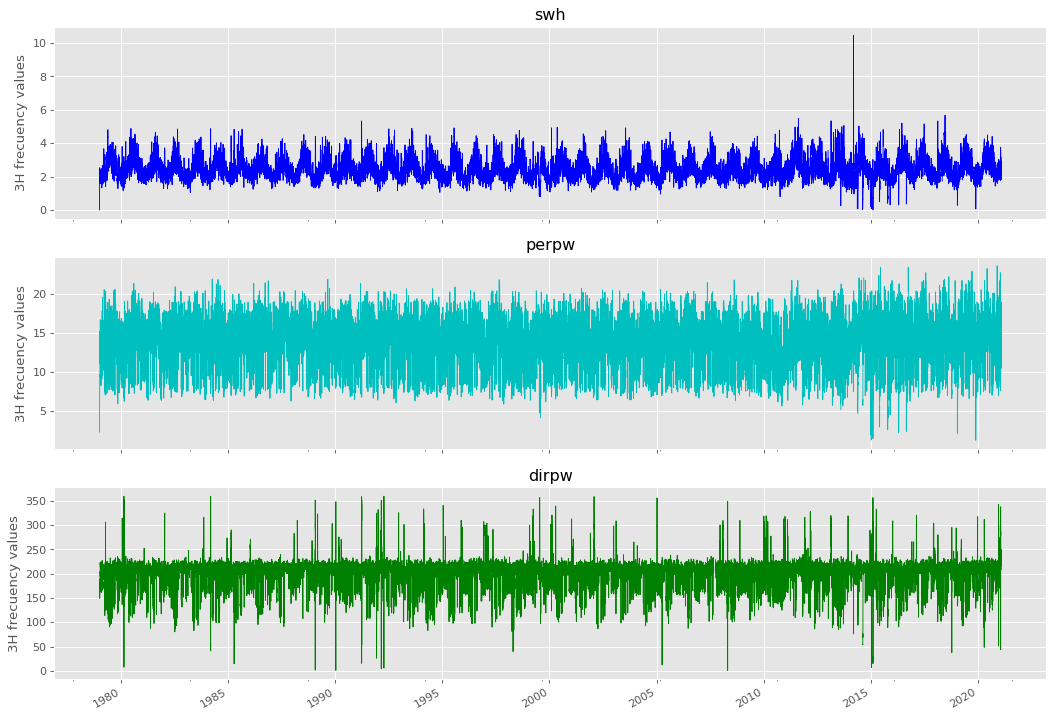

In [ ]:
fig, axs = plt.subplots(figsize=(16,12),nrows=3,dpi=80,sharex=True)
colrs=['b','c','g']
for n,ax in enumerate(axs.flatten()):
  dfs.iloc[:,n].plot(ax=ax,lw=.8,color=colrs[n])
  ax.set_title(dfs.columns.values[n])
  ax.set_xlabel('')
  ax.set_ylabel('3H frecuency values')